In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,LSTM,Dropout,BatchNormalization
from tensorflow.keras.applications import VGG16,InceptionV3
import pandas as pd

In [ ]:
data= cifar10.load_data()
(x_train,y_train),(x_test,y_test)=data


x_train=x_train/255
x_test=x_test/255

In [ ]:
model = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))

for layers in model.layers:
    layers.trainable=False


x_train=model.predict(x_train)
x_test=model.predict(x_test)

x_train = x_train.reshape(-1, 16, 16, 2)  # Example with (16, 16, 2)
x_test = x_test.reshape(-1, 16, 16, 2)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)


(50000, 16, 16, 2)
(10000, 16, 16, 2)
(10000, 1)
(50000, 1)


In [ ]:
model = Sequential([
    Conv2D(128,(3,3),activation="relu",input_shape=(16,16,2)),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Dropout(0.2),
    Flatten(),
    Dense(10,activation="softmax")
])

In [ ]:
model = Sequential([
    Dense(128,activation="relu",input_shape=(16,16,2)),
    Dropout(0.2),
    Flatten(),
    Dense(10,activation="softmax")
])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=1,
)

In [ ]:
model.compile(metrics=["accuracy"],loss="sparse_categorical_crossentropy",optimizer="adam")

In [ ]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4789 - loss: 1.4911 - val_accuracy: 0.5552 - val_loss: 1.2734
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5699 - loss: 1.2349 - val_accuracy: 0.5572 - val_loss: 1.2698
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5777 - loss: 1.2097 - val_accuracy: 0.5746 - val_loss: 1.2228
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5884 - loss: 1.1844 - val_accuracy: 0.5778 - val_loss: 1.2170
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5921 - loss: 1.1734 - val_accuracy: 0.5763 - val_loss: 1.2201
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5946 - loss: 1.1611 - val_accuracy: 0.5836 - val_loss: 1.2018
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6021 - loss: 1.1410 - val_accuracy: 0.5847 - val_loss: 1.1994
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6057 - loss: 1.1335 - 

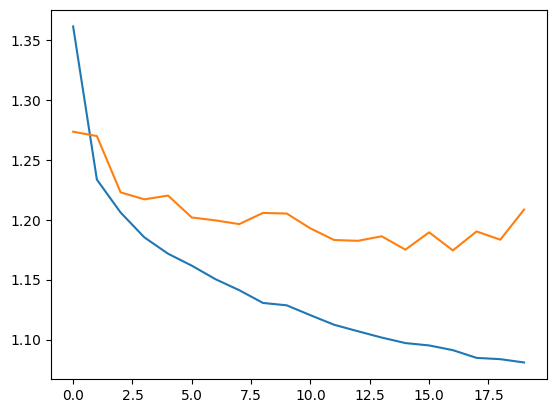

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [2]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

In [3]:
train_data=datasets.CIFAR10(root="data",train=True,download=True,transform=transforms.ToTensor())
test_data=datasets.CIFAR10(root="data",train=False,download=True,transform=transforms.ToTensor())

loaded_train_data=DataLoader(train_data,batch_size=32,shuffle=True)
loaded_test_data=DataLoader(test_data,batch_size=32,shuffle=True )

100%|██████████| 170M/170M [00:05<00:00, 28.6MB/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [31]:
import torch
import torch.nn as nn

class basic_cnn(nn.Module):
  def __init__(self):
    super(basic_cnn,self).__init__()
    self.conv1=nn.Conv2d(3,128,3)
    self.conv2=nn.Conv2d(128,128,3)
    self.pool=nn.MaxPool2d(2,2)
    self.conv3=nn.Conv2d(128,128,3)
    self.conv4=nn.Conv2d(128,128,3)
    self.fc1=None
    self.fc2=nn.Linear(128,10)

  def forward(self,x):
    x=self.pool(self.conv1(x))
    x=self.pool(self.conv2(x))
    x=self.conv3(x)
    x=self.pool(self.conv4(x))

    x=x.view(x.shape[0],-1)

    if self.fc1 is None:
      self.fc1=nn.Linear(x.shape[1],128)
      self.fc1.to(x.device)

    x=self.fc1(x)
    x=self.fc2(x)

    return x

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.to(device)

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0  # Reset running loss each epoch
    for batch_idx, (images, labels) in enumerate(loaded_train_data):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss_value = loss_fn(outputs, labels)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        running_loss += loss_value.item()

        # Print every 100 batches
        if batch_idx % 100 == 99:
            print(f"[Epoch {epoch + 1}, Batch {batch_idx + 1}] Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("🎉 Training Completed!")



[Epoch 1, Batch 100] Loss: 0.198
[Epoch 1, Batch 200] Loss: 0.182
[Epoch 1, Batch 300] Loss: 0.207
[Epoch 1, Batch 400] Loss: 0.240
[Epoch 1, Batch 500] Loss: 0.225
[Epoch 1, Batch 600] Loss: 0.266
[Epoch 1, Batch 700] Loss: 0.272
[Epoch 1, Batch 800] Loss: 0.267
[Epoch 1, Batch 900] Loss: 0.260
[Epoch 1, Batch 1000] Loss: 0.220
[Epoch 1, Batch 1100] Loss: 0.266
[Epoch 1, Batch 1200] Loss: 0.254
[Epoch 1, Batch 1300] Loss: 0.207
[Epoch 1, Batch 1400] Loss: 0.212
[Epoch 1, Batch 1500] Loss: 0.283
[Epoch 2, Batch 100] Loss: 0.176
[Epoch 2, Batch 200] Loss: 0.168
[Epoch 2, Batch 300] Loss: 0.138
[Epoch 2, Batch 400] Loss: 0.215
[Epoch 2, Batch 500] Loss: 0.192
[Epoch 2, Batch 600] Loss: 0.155
[Epoch 2, Batch 700] Loss: 0.238
[Epoch 2, Batch 800] Loss: 0.261
[Epoch 2, Batch 900] Loss: 0.208
[Epoch 2, Batch 1000] Loss: 0.220
[Epoch 2, Batch 1100] Loss: 0.277
[Epoch 2, Batch 1200] Loss: 0.221
[Epoch 2, Batch 1300] Loss: 0.226
[Epoch 2, Batch 1400] Loss: 0.229
[Epoch 2, Batch 1500] Loss: 0.27

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in loaded_test_data:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

In [ ]:
#unet for dermodoc

